Loss: 11.662055935981375
Example Result


TypeError: Invalid shape (192, 192, 3, 404) for image data

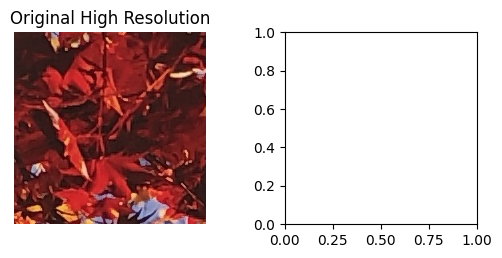

In [26]:
from baseline_model import baseline_bicubic
from data_sets_loaders import get_train_val_test_dataloaders
import matplotlib.pyplot as plt
import torch
import numpy as np
from loss_functions import CombinedLoss
from discriminator_model import DiscriminatorModel

cropped_dir = "./cropped_images"
train_dl, val_dl, test_dl = get_train_val_test_dataloaders(100)

total_loss = 0
loss_fn = CombinedLoss(0.0, 1.0, 1.0, 1.0, 4.0).double()
outputs = []

# Loop
for lr_batch, hr_batch in test_dl:
	for i, image_arr in enumerate(lr_batch):
		output = baseline_bicubic(image_arr)
		outputs.append(output)
		loss = loss_fn(torch.unsqueeze(torch.from_numpy(output), 0), torch.unsqueeze(hr_batch[i],0), torch.from_numpy(np.zeros(len(lr_batch))))
		total_loss += loss.item()
	
print("Loss: " + str(total_loss / len(outputs)))

Example Result


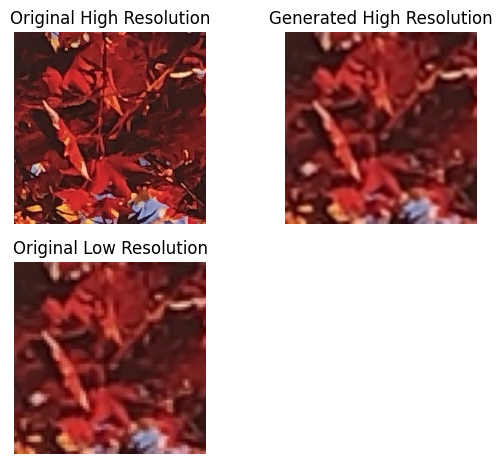

In [28]:
print("Example Result")
fig = plt.figure()
plt.subplots_adjust(bottom=0.000001)
for lr_batch, hr_batch in test_dl:
	for image_arr in hr_batch:
		fig.add_subplot(2, 2, 1) 
		plt.imshow(np.transpose(image_arr))
		plt.axis('off')
		plt.title("Original High Resolution") 
		fig.add_subplot(2, 2, 2) 
		plt.imshow(np.transpose(outputs[0]))
		plt.axis('off')
		plt.title("Generated High Resolution") 
		fig.add_subplot(2, 2, 3) 
		plt.imshow(np.transpose(lr_batch[0]))
		plt.axis('off')
		plt.title("Original Low Resolution") 
		break
	break
plt.show()
